## Persiapan Library dan Data

In [ ]:
import os
import pandas as pd
from google.colab.patches import cv2_imshow
from skimage import feature
from imutils import paths
import numpy as np
import cv2 as cv

In [ ]:
# melakukan unzip file gambar
import zipfile
from google.colab import drive

# drive.mount('/content/drive/')

zip_ref = zipfile.ZipFile('drive/My Drive/BARU/Archive.zip', 'r')
zip_ref.extractall()
zip_ref.close()

In [ ]:
train_path = os.path.join('training')
test_path = os.path.join('testing')

In [ ]:
os.listdir(test_path)

['1', '2', '0', '.DS_Store']

## Fungsi Preprocessing

In [ ]:
def preprocess(image, image_size=128):
		image = cv.cvtColor(image, cv.COLOR_BGR2GRAY) # Ubah mehjadi grayscale
		image = cv.resize(image, (image_size, image_size)) # Resize gambar menjadi suatu ukuran (default = 128)

		image = cv.threshold(image, 0, 255, cv.THRESH_BINARY_INV | cv.THRESH_OTSU)[1] # Melakukan thresholding dan mengambil hasil gambar thresholding

		return image

## Fungsi Feature Extraction

In [ ]:
# fungsi mengekstrak feature metode 'hog'
def quantify_image_hog(image): # Histogram of Oriented Gradient (hog) features
	features = feature.hog(image, orientations=9, pixels_per_cell=(10, 10), cells_per_block=(2, 2), transform_sqrt=True, block_norm="L1")

	return features

In [ ]:
# fungsi mengekstrak feature metode 'lbp'
def quantify_image_lbp(image): # Local Binary Pattern  (lbp) features
  features = feature.local_binary_pattern(image, 24, 8, method="uniform")

  (hist, _) = np.histogram(features.flatten(), bins=np.arange(0, 27), range=(0, 26))

  hist = hist.astype("float")
  hist /= (hist.sum() + 1e-7)

  return hist

## Fungsi Split Dataset

In [ ]:
# fungsi memisahkan dataset 'data' dan 'label'
def load_split(path, image_size=200, extraction_method='hog'):
  image_paths = list(paths.list_images(path))
  data = []
  labels = []

  for image_path in image_paths:
    label = image_path.split(os.path.sep)[-2]

    image = cv.imread(image_path)
    image = preprocess(image, image_size=image_size)

    if extraction_method == 'hog':
      features = quantify_image_hog(image)
    elif extraction_method == 'lbp':
      features = quantify_image_lbp(image)

    data.append(features)
    labels.append(label)

  return (np.array(data), np.array(labels))

## Melatih dan Evaluasi Model

In [ ]:
# Library Pelatihan dan Evaluasi Model
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# fungsi image classification

def image_class(extraction, resize):
  # membagi feature dan label pada data training
  (feature_train, label_train) = load_split(train_path, image_size=resize, 
                                          extraction_method=extraction)

  # membagi feature dan label pada data testing
  (feature_test, label_test) = load_split(test_path, image_size=resize,
                                        extraction_method=extraction)
  
  # Label Encoder
  laben = LabelEncoder()
  label_train = laben.fit_transform(label_train)
  label_test = laben.fit_transform(label_test)

  # Model Linear SVC
  model_lsvc = LinearSVC(loss='squared_hinge', C=100)
  model_lsvc.fit(feature_train, label_train)
  lebel_pred_lsvc = model_lsvc.predict(feature_test)

  # Model Logistic Regression
  model_lr = LogisticRegression()
  model_lr.fit(feature_train, label_train)
  label_pred_lr = model_lr.predict(feature_test)

  # Model Random Forest Classifier
  model_rfc = RandomForestClassifier(n_estimators=1000, criterion='entropy', 
                                     max_depth=5, max_features='auto', 
                                     random_state=10)
  model_rfc.fit(feature_train, label_train)
  label_pred_rfc = model_rfc.predict(feature_test)

  nama_model = ['Linear SVC', 'Logistic Regression', 'Random Forest Classifier']
  model = [model_lsvc, model_lr, model_rfc]
  label_pred = [lebel_pred_lsvc, label_pred_lr, label_pred_rfc]

  # Evaluasi model
  for i, label in enumerate(label_pred):
    print('Nilai Akurasi data test {}'.format(nama_model[i]))
    print('- Accuracy \t: {:.2f}'.format(model[i].score(feature_test, label_test)))
    print('- F1 \t\t: {:.2f}'.format(f1_score(label_test, label, average='macro')))
    print('- Precission \t: {:.2f}'.format(precision_score(label_test, label, average='macro')))
    print('- Recall \t: {:.2f}'.format(recall_score(label_test, label, average='macro')))
    print('\n')

In [ ]:
# Feature extractor HOG dengan image size 28
image_class('hog', 28)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Nilai Akurasi data test Linear SVC
- Accuracy 	: 0.98
- F1 		: 0.98
- Precission 	: 0.98
- Recall 	: 0.98


Nilai Akurasi data test Logistic Regression
- Accuracy 	: 0.97
- F1 		: 0.97
- Precission 	: 0.97
- Recall 	: 0.97


Nilai Akurasi data test Random Forest Classifier
- Accuracy 	: 0.97
- F1 		: 0.97
- Precission 	: 0.97
- Recall 	: 0.97




In [ ]:
# Feature extractor HOG dengan image size 128
image_class('hog', 128)

Nilai Akurasi data test Linear SVC
- Accuracy 	: 0.99
- F1 		: 0.99
- Precission 	: 0.99
- Recall 	: 0.99


Nilai Akurasi data test Logistic Regression
- Accuracy 	: 0.99
- F1 		: 0.99
- Precission 	: 0.99
- Recall 	: 0.99


Nilai Akurasi data test Random Forest Classifier
- Accuracy 	: 0.98
- F1 		: 0.98
- Precission 	: 0.98
- Recall 	: 0.98




## Melatih dan Evaluasi dengan 1 Model Terbaik

In [ ]:
# ukuran gambar dan metode extraction
resize = 128
extraction = 'hog'

In [ ]:
# membagi feature dan label pada data training
(feature_train, label_train) = load_split(train_path, image_size=resize, 
                                          extraction_method=extraction)

# membagi feature dan label pada data testing
(feature_test, label_test) = load_split(test_path, image_size=resize,
                                        extraction_method=extraction)

In [ ]:
# pembuatan label
laben = LabelEncoder()
label_train = laben.fit_transform(label_train)
label_test = laben.fit_transform(label_test)

In [ ]:
len(label_train)

5792

In [ ]:
len(label_test)

900

In [ ]:
# Algoritma SVC
model_lsvc = LinearSVC(loss='squared_hinge', C=100)
model_lsvc.fit(feature_train, label_train)
lebel_pred_lsvc = model_lsvc.predict(feature_test)

### melihat hasil prediksi pada data testing yang tersedia

In [ ]:
testing_paths = list(paths.list_images(test_path))
images = []

for testing_path in testing_paths[100:125]:
	image = cv.imread(testing_path)
	output = image.copy()
	output = cv.resize(output, (128, 128))
	image = preprocess(image, image_size=resize)
	if extraction == 'hog':
		features = quantify_image_hog(image)
	elif extraction == 'lbp':
		features = quantify_image_lbp(image)
	preds = model_lr.predict([features])
	label = laben.inverse_transform(preds)[0]
	if label == '0':
		color = (255, 0, 0)
	elif label == '1':
		color = (0, 255, 0)
	else:
		color = (0, 0, 255)
	cv.putText(output, label, (3, 20), cv.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
	images.append(output)

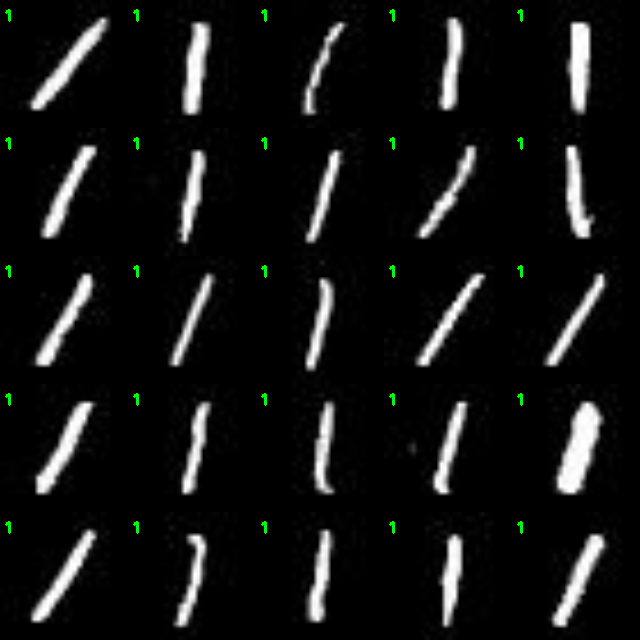

In [ ]:
# hasil prediksi data test yang disediakan
from imutils import build_montages

montage = build_montages(images, (128, 128), (5, 5))[0]

cv2_imshow(montage)

### melihat hasil prediksi pada data testing buatan

In [ ]:
test1_path = 'drive/My Drive/foto_test'

In [ ]:
testing_paths1 = list(paths.list_images(test1_path))
images_test = []

for testing_path in testing_paths1:
	image = cv.imread(testing_path)
	output = image.copy()
	output = cv.resize(output, (128, 128))
	image = preprocess(image, image_size=resize)
	if extraction == 'hog':
		features = quantify_image_hog(image)
	elif extraction == 'lbp':
		features = quantify_image_lbp(image)
	preds = model_lr.predict([features])
	label = laben.inverse_transform(preds)[0]
	if label == '0':
		color = (255, 0, 0)
	elif label == '1':
		color = (0, 255, 0)
	else:
		color = (0, 0, 255)
	cv.putText(output, label, (3, 20), cv.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
	images_test.append(output)

In [ ]:
len(images_test)

18

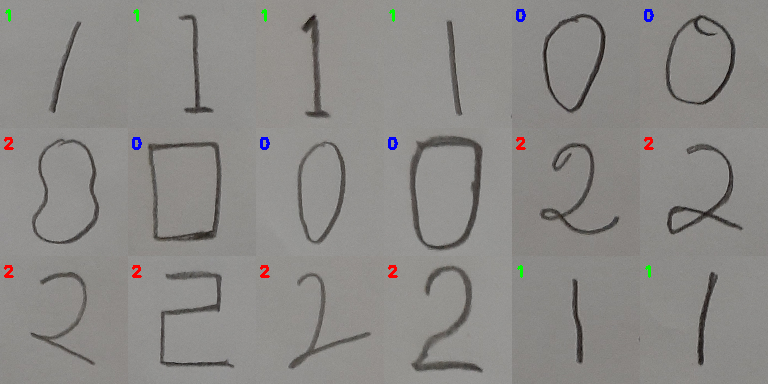

In [ ]:
# hasil prediksi data test buatan
from imutils import build_montages

montage = build_montages(images_test, (128, 128), (6, 3))[0]

cv2_imshow(montage)